In [1]:
import utils
import ImageClassification as ic

c:\Users\lilywhite\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


data=26640, label=26640, trainingset=180


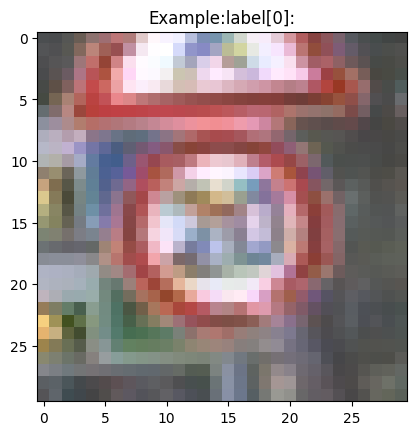

In [2]:
data, label = utils.loadTrainData(showExample=True)

In [3]:
X_train, X_test, y_train, y_test = utils.seperateDataset(data, label)

X_train=torch.Size([21312, 3, 30, 30]), X_test=torch.Size([5328, 3, 30, 30])
y_train=torch.Size([21312]), y_test=torch.Size([5328])


In [4]:
from torch import nn,optim
batch_num = 64  # batch大小
epoch_num = 100 # 训练轮次数
val_num = 5     # 训练几轮验证一次

model = ic.Net()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

loss, acc = ic.train(X_train, y_train, X_test, y_test, model,
                     loss_function, optimizer, batch_num, epoch_num, val_num, output_log=False)

c:\Users\lilywhite\.conda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


[2025-03-26 22:49:12] epoch 5 | loss:0.3812 | acc:0.8140 | time:88.48s
[2025-03-26 22:50:41] epoch 10 | loss:0.4646 | acc:0.8057 | time:87.78s
[2025-03-26 22:52:12] epoch 15 | loss:0.3889 | acc:0.8853 | time:90.30s
[2025-03-26 22:53:46] epoch 20 | loss:0.7829 | acc:0.9017 | time:92.77s
[2025-03-26 22:55:28] epoch 25 | loss:0.4743 | acc:0.8750 | time:100.27s
[2025-03-26 22:57:12] epoch 30 | loss:1.1336 | acc:0.9187 | time:102.43s
[2025-03-26 22:58:55] epoch 35 | loss:0.0065 | acc:0.9264 | time:102.48s
[2025-03-26 23:00:38] epoch 40 | loss:2.9559 | acc:0.9221 | time:101.24s
[2025-03-26 23:02:17] epoch 45 | loss:0.8486 | acc:0.8936 | time:97.60s
[2025-03-26 23:03:56] epoch 50 | loss:0.1146 | acc:0.9176 | time:97.95s
[2025-03-26 23:05:36] epoch 55 | loss:0.2654 | acc:0.9381 | time:99.03s
[2025-03-26 23:07:16] epoch 60 | loss:0.0845 | acc:0.9424 | time:98.70s
[2025-03-26 23:08:57] epoch 65 | loss:3.2472 | acc:0.8919 | time:98.98s
[2025-03-26 23:10:38] epoch 70 | loss:0.9231 | acc:0.9356 | t

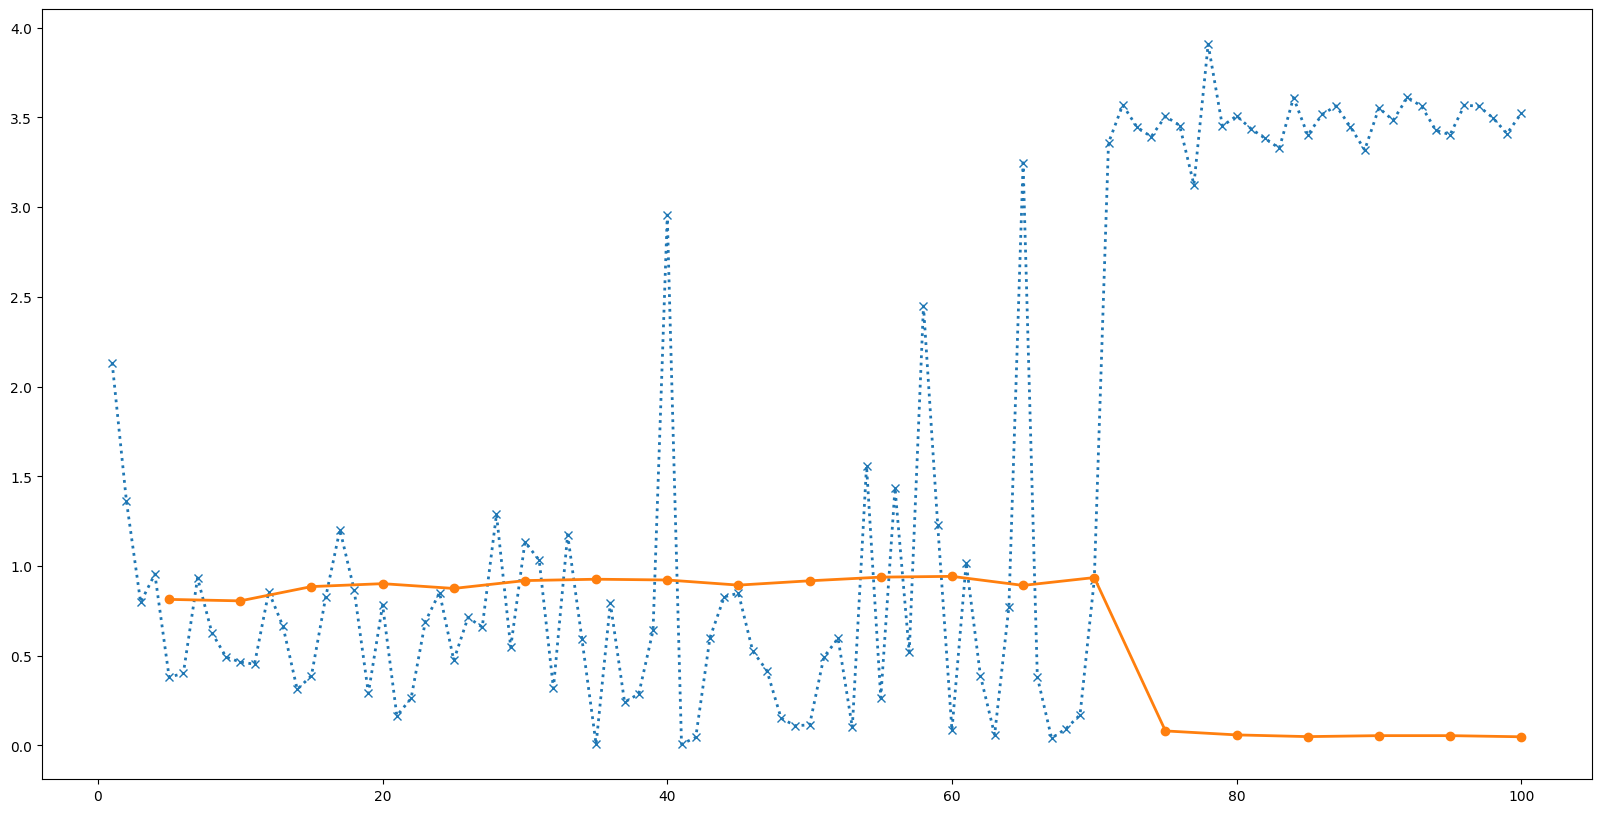

In [5]:
utils.illustrate(loss, acc, saveFig="ModelTraning.png")

In [6]:
test = utils.loadTestData(showExample=False)

test images=12630


d:\Python_Code\CNN-GTSRB\utils.py:74: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  test = torch.FloatTensor(test)


In [7]:
utils.predict(model, test, showExample=True)

Finished Predicting! processed images=12630
00000.ppm is labeled as 10
00001.ppm is labeled as 10
00002.ppm is labeled as 10
00003.ppm is labeled as 10
00004.ppm is labeled as 10
00005.ppm is labeled as 10
00006.ppm is labeled as 10
00007.ppm is labeled as 10
00008.ppm is labeled as 10
00009.ppm is labeled as 10
